In [2]:
!pip install pyarrow

In [42]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 41.0 MB/s eta 0:00:0000:0100:01


In [43]:
import pandas as pd
import time
import numpy as np
import boto3


from io import BytesIO, StringIO

In [3]:
path = 'dados/wine_data.csv'

In [4]:
dados = pd.read_csv(path)

In [5]:
dados.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
dados.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [7]:
dados['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
150925    150925
150926    150926
150927    150927
150928    150928
150929    150929
Name: Unnamed: 0, Length: 150930, dtype: int64

In [8]:
dados.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
dados.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [10]:
dados['province']

0                 California
1             Northern Spain
2                 California
3                     Oregon
4                   Provence
                 ...        
150925        Southern Italy
150926             Champagne
150927        Southern Italy
150928             Champagne
150929    Northeastern Italy
Name: province, Length: 150930, dtype: object

In [11]:
dados[['country', 'province']]

,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence
...,...,...
150925,Italy,Southern Italy
150926,France,Champagne
150927,Italy,Southern Italy
150928,France,Champagne


In [12]:
dados.index

RangeIndex(start=0, stop=150930, step=1)

In [13]:
type(dados)

pandas.core.frame.DataFrame

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [15]:
dados.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [16]:
type(dados.country)

pandas.core.series.Series

In [17]:
dados.country

0             US
1          Spain
2             US
3             US
4         France
           ...  
150925     Italy
150926    France
150927     Italy
150928    France
150929     Italy
Name: country, Length: 150930, dtype: object

In [18]:
def converterParaMinusculo(texto):
    return texto.lower() if type(texto) == str else None

In [19]:
a = time.time()
dados['country_minusculo'] = dados['country'].apply(converterParaMinusculo)
print(time.time() - a)

0.030879735946655273


In [20]:
dados.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,us
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,spain
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,us
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,us
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,france


In [21]:
a = time.time()
dados['province_minusculo'] = dados['province'].apply(lambda x: x.lower() if type(x) == str else None)
print(time.time() - a)

0.03983736038208008


In [22]:
dados.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,us,california
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,spain,northern spain
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,us,california
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,us,oregon
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,france,provence


In [23]:
dados['preco_ao_quadrado'] = dados['price'].apply(lambda x: x**2)


In [24]:
dados.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo,preco_ao_quadrado
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,us,california,55225.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,spain,northern spain,12100.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,us,california,8100.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,us,oregon,4225.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,france,provence,4356.0


In [25]:
dados[dados.country_minusculo == 'brazil'].count()

country               25
description           25
designation           18
points                25
price                 25
province              25
region_1               0
region_2               0
variety               25
winery                25
country_minusculo     25
province_minusculo    25
preco_ao_quadrado     25
dtype: int64

In [26]:
dados.query("country == 'Brazil'")

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo,preco_ao_quadrado
8999,Brazil,"Cherry, plum and earth aromas form a sound bou...",Agnus,88,15.0,Serra Gaúcha,NaN,NaN,Merlot,Lidio Carraro,brazil,serra gaúcha,225.0
44199,Brazil,"Taut, dense and ripe, this 50/50 blend of Cabe...",Lote 43,85,35.0,Vale dos Vinhedos,NaN,NaN,Cabernet Sauvignon-Merlot,Vinícola Miolo,brazil,vale dos vinhedos,1225.0
45448,Brazil,"Overly earthy, but ripe and concentrated with ...",Castas Portuguesas Quinta do Seival,84,29.0,Brazil,NaN,NaN,Red Blend,Vinícola Miolo,brazil,brazil,841.0
46041,Brazil,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cuvée Giuseppe,84,11.0,Vale dos Vinhedos,NaN,NaN,Cabernet Sauvignon-Merlot,Vinícola Miolo,brazil,vale dos vinhedos,121.0
46312,Brazil,An earthy blend of Cabernet Sauvignon and Merl...,RAR Family Reserve,83,27.0,Serra Gaúcha,NaN,NaN,Cabernet Sauvignon-Merlot,Vinícola Miolo,brazil,serra gaúcha,729.0
46615,Brazil,"Simple but pleasing, with high-toned strawberr...",NaN,82,13.0,Vale dos Vinhedos,NaN,NaN,Merlot,Vinícola Miolo,brazil,vale dos vinhedos,169.0
47195,Brazil,There's some density here but also rustic scen...,NaN,81,13.0,Vale dos Vinhedos,NaN,NaN,Cabernet Sauvignon,Vinícola Miolo,brazil,vale dos vinhedos,169.0
65423,Brazil,"Pretty nice for a Brazilian sparkler, with a s...",Brut,84,13.0,Brazil,NaN,NaN,Sparkling Blend,Cordelier,brazil,brazil,169.0
73421,Brazil,"This is mentholated and spicy, with a brandied...",Innominabile Lote IV,86,35.0,Santa Catarina,NaN,NaN,Bordeaux-style Red Blend,Villaggio Grando,brazil,santa catarina,1225.0
75224,Brazil,This opens with dusty dried-apple aromas. High...,Brut,83,31.0,Santa Catarina,NaN,NaN,Sparkling Blend,Villaggio Grando,brazil,santa catarina,961.0


In [27]:
df_volumetria_paises = pd.DataFrame(dados.country.value_counts())

<Axes: >

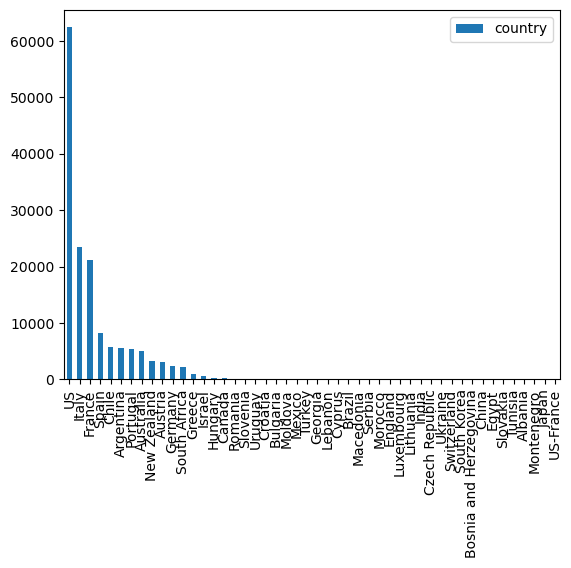

In [28]:
df_volumetria_paises.plot(kind='bar')

In [29]:
df_volumetria_paises.to_csv('dados/volumetria_paises.csv')

In [30]:
br_dados = dados[dados.country_minusculo == 'brazil'][['price', 'province_minusculo', 'description', 'variety', 'winery']]

In [31]:
br_dados = br_dados.sort_values(by='price')

In [32]:
br_dados.to_json('dados/brasil_evalution_wine.json')

In [33]:
br_dados.to_parquet('dados/brasil_evalution_wine.parquet')

In [34]:
br_dados.to_csv('dados/brasil_evalution_wine.csv')

In [35]:
br_dados.to_csv('dados/brasil_evalution_wine.csv', index=False)

In [36]:
br_dados.columns

Index(['price', 'province_minusculo', 'description', 'variety', 'winery'], dtype='object')

In [37]:
sorted(br_dados.columns)

['description', 'price', 'province_minusculo', 'variety', 'winery']

In [38]:
br_dados[['description', 'variety', 'province_minusculo']]

,description,variety,province_minusculo
118221,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cabernet Sauvignon-Merlot,vale dos vinhedos
46041,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cabernet Sauvignon-Merlot,vale dos vinhedos
105381,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cabernet Sauvignon-Merlot,vale dos vinhedos
148823,"Pretty nice for a Brazilian sparkler, with a s...",Sparkling Blend,brazil
118885,"Simple but pleasing, with high-toned strawberr...",Merlot,vale dos vinhedos
106535,There's some density here but also rustic scen...,Cabernet Sauvignon,vale dos vinhedos
46615,"Simple but pleasing, with high-toned strawberr...",Merlot,vale dos vinhedos
47195,There's some density here but also rustic scen...,Cabernet Sauvignon,vale dos vinhedos
65423,"Pretty nice for a Brazilian sparkler, with a s...",Sparkling Blend,brazil
105955,"Simple but pleasing, with high-toned strawberr...",Merlot,vale dos vinhedos


In [39]:
br_dados = br_dados.reindex(sorted(br_dados.columns), axis=1)

In [40]:
br_dados.to_csv('dados/xpto.csv')

<Axes: title={'center': 'Anderson Fmz'}>

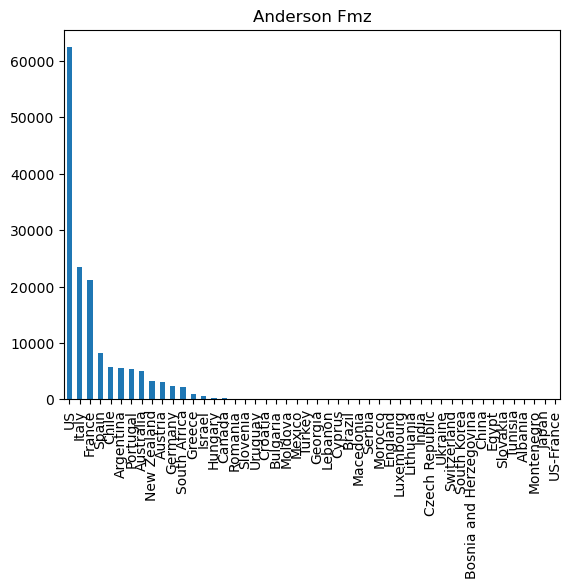

In [41]:
dados.country.value_counts().plot(kind='bar', title='Anderson Fmz')

In [44]:
client = boto3.client('s3', 
    endpoint_url='http://awari-minio-nginx:9000',
    aws_access_key_id='hfUUMyDR0q7bhakG',
    aws_secret_access_key='5HifRobXEdo9B7AJ0Sdv5oEfKhT2Qmgm',
    aws_session_token=None,
    config=boto3.session.Config(signature_version='s3v4'),
    verify=False,
    region_name='sa-east-1'
)

In [45]:
data = {
    'macas': [3, 2, 0, 1], 
    'laranjas': [0, 3, 7, 2]
}

In [46]:
data

{'macas': [3, 2, 0, 1], 'laranjas': [0, 3, 7, 2]}

In [47]:
type(data)

dict

In [48]:
compras = pd.DataFrame(data, index=['Alex', 'Roberto', 'Bernardo', 'Paulo'])

In [49]:
compras

,macas,laranjas
Alex,3,0
Roberto,2,3
Bernardo,0,7
Paulo,1,2


In [51]:
csv_buffer = StringIO()
compras.to_csv(csv_buffer)

In [52]:
csv_buffer.getvalue()

',macas,laranjas\nAlex,3,0\nRoberto,2,3\nBernardo,0,7\nPaulo,1,2\n'

In [53]:
client.put_object(Body=csv_buffer.getvalue(), Bucket='wine-rating', Key="exemplos/anderson/compras.csv")

{'ResponseMetadata': {'RequestId': '17F8EEE102A97A59',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 26 Sep 2024 23:25:07 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"ff0e787fc7fe74fb3fc321c5c0aadf5c"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '17F8EEE102A97A59',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block',
   'x-amz-version-id': 'd4b94d69-2f6e-4e9b-87bd-485537fab03c'},
  'RetryAttempts': 0},
 'ETag': '"ff0e787fc7fe74fb3fc321c5c0aadf5c"',
 'VersionId': 'd4b94d69-2f6e-4e9b-87bd-485537fab03c'}

In [57]:
dados_aux = dados.fillna('empty')

In [65]:
dados_aux.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo,preco_ao_quadrado
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,us,california,55225.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,empty,Tinta de Toro,Bodega Carmen Rodríguez,spain,northern spain,12100.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,us,california,8100.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,us,oregon,4225.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,empty,Provence red blend,Domaine de la Bégude,france,provence,4356.0


In [61]:
countries = dados.country.drop_duplicates()

In [ ]:
country == 'US'

In [66]:
for country in countries:
    df = dados_aux.query(f"country == '{country}'")
    csv_buffer = StringIO()
    df.to_csv(csv_buffer)
    client.put_object(Body=csv_buffer.getvalue(), Bucket='wine-rating', Key=f"datalake/{country}/{country}_dados.csv")

In [67]:
nan_df = pd.read_csv('dados/nan_dados.csv')

In [68]:
nan_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo,preco_ao_quadrado


In [69]:
england_df = pd.read_csv('dados/England_dados.csv')

In [70]:
england_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_minusculo,province_minusculo,preco_ao_quadrado
0,28800,England,"Gentle white blossom, white currant and Golden...",Blanc de Blancs,94,45.0,England,empty,empty,Chardonnay,Hattingley Valley Wines,england,england,2025.0
1,28801,England,"A lifting mix of golden, ripe apple, chamomile...",South Ridge Cuvée Merret Brut,94,38.0,England,empty,empty,Sparkling Blend,Ridgeview Estate,england,england,1444.0
2,28818,England,Sophisticated aromas of Golden Pearmain apples...,Blanc de Blancs,94,49.0,England,empty,empty,Chardonnay,Wiston Estate Winery,england,england,2401.0
3,28822,England,Both the fruit and the aromatic foliage of wil...,Rosé,94,44.0,England,empty,empty,Sparkling Blend,Wiston Estate Winery,england,england,1936.0
4,28828,England,"This has the crunchy, enticing freshness of th...",Blanc de Blancs,94,empty,England,empty,empty,Chardonnay,Bolney Wine Estate,england,england,empty
